In [17]:
import sqlite3

In [18]:
import numpy as np
import pandas as pd
import sqlite3

conn = sqlite3.connect('FPA_FOD_20170508.sqlite')
print("Connection Successful")
df = pd.read_sql("SELECT * from Fires",con=conn)
df
# conn.close()


Connection Successful


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,...,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

In [20]:
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
# Changing the data format for the above columns

### Code to check the missing values.

In [21]:
total= df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys = ['Total missing values', 'Percentage of missing values'])
missing_data

,Total missing values,Percentage of missing values
COMPLEX_NAME,1875282,0.997244
MTBS_ID,1869462,0.994149
MTBS_FIRE_NAME,1869462,0.994149
ICS_209_INCIDENT_NUMBER,1854748,0.986324
ICS_209_NAME,1854748,0.986324
FIRE_CODE,1555636,0.827261
LOCAL_FIRE_REPORT_ID,1459286,0.776024
CONT_TIME,972173,0.516985
FIRE_NAME,957189,0.509017
CONT_DOY,891531,0.474101


## SAMPLING TECHNIQUE 1:
Using Simple Sample method of Pandas DF. Taking 20% of the original data. (376093 entries)

In [22]:
fires_sample = df.sample(frac=2/10, random_state=10)
fires_sample.info()
# taking 20% of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376093 entries, 1466193 to 1076111
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   OBJECTID                    376093 non-null  int64         
 1   FOD_ID                      376093 non-null  int64         
 2   FPA_ID                      376093 non-null  object        
 3   SOURCE_SYSTEM_TYPE          376093 non-null  object        
 4   SOURCE_SYSTEM               376093 non-null  object        
 5   NWCG_REPORTING_AGENCY       376093 non-null  object        
 6   NWCG_REPORTING_UNIT_ID      376093 non-null  object        
 7   NWCG_REPORTING_UNIT_NAME    376093 non-null  object        
 8   SOURCE_REPORTING_UNIT       376093 non-null  object        
 9   SOURCE_REPORTING_UNIT_NAME  376093 non-null  object        
 10  LOCAL_FIRE_REPORT_ID        84369 non-null   object        
 11  LOCAL_INCIDENT_ID           2120

## SAMPLING TECHNIQUE 2:
Taking 15K samples from each year.

In [23]:
df1 = pd.read_sql("SELECT * FROM Fires WHERE FIRE_YEAR = 2015 LIMIT 15000",con=conn)

In [24]:
df1.shape

(15000, 39)

In [25]:
for i in range(1992,2014):
    Query1 = "SELECT * FROM Fires WHERE FIRE_YEAR = ? LIMIT 15000"
    df1 = df1.append(pd.read_sql(Query1, conn, params = [i]))

In [26]:
df1.shape

(345000, 39)

### Sampling data based on year(getting equal number of records per year)


In [27]:
new_df = df.groupby('FIRE_YEAR').apply(lambda x: x.sample(n=1000)).reset_index(drop = True)

In [28]:
new_df.size

936000

In [29]:
uniq = df['FIRE_YEAR'].unique()
new_df['FIRE_YEAR'].value_counts()

2015    1000
1999    1000
2001    1000
2002    1000
2003    1000
2004    1000
2005    1000
2006    1000
2007    1000
1992    1000
2008    1000
1993    1000
2009    1000
1994    1000
2010    1000
1995    1000
2011    1000
1996    1000
2012    1000
1997    1000
2013    1000
1998    1000
2014    1000
2000    1000
Name: FIRE_YEAR, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b4890190>]],
      dtype=object)

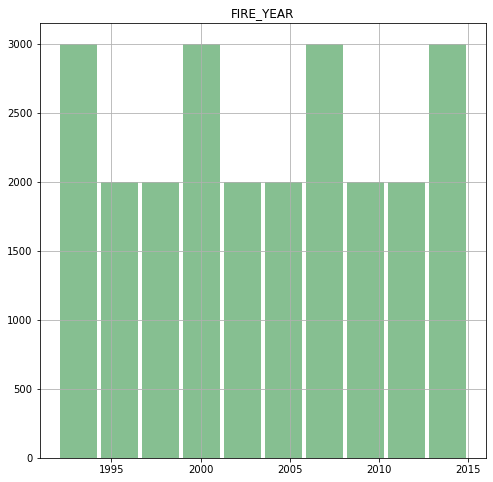

In [30]:
import matplotlib.pyplot as plt
new_df.hist(column="FIRE_YEAR", figsize=(8,8), color='#86bf91', rwidth=0.9)

### Sampling Technique 3 - Take 28k samples from each STAT_CAUSE_CODE group. Since we are predicting the cause, it is important to take equal samples from each cause
### Total rows - 364000

In [46]:
df1 = df.groupby(['STAT_CAUSE_CODE'])
df1.describe()

OBJECTID                                                     \
                    count          mean            std       min         25%   
STAT_CAUSE_CODE                                                                
1.0              278468.0  6.182242e+05  603861.245804       2.0   131365.75   
2.0              147612.0  9.859020e+05  480042.735458      17.0   585343.25   
3.0               52869.0  9.427785e+05  498327.361871     182.0   545481.00   
4.0               76139.0  7.851288e+05  643296.992689      14.0   140681.50   
5.0              429028.0  1.047023e+06  479350.180101       3.0   627100.75   
6.0               33455.0  9.523734e+05  364472.107493     100.0   846210.00   
7.0              281455.0  8.997305e+05  478039.479251      38.0   513904.00   
8.0               61167.0  8.682445e+05  496165.192470      89.0   419251.00   
9.0              323805.0  1.052286e+06  525147.625965       1.0   632733.00   
10.0              11500.0  8.363841e+05  637956.004778  173897.0   265130.75   
11.0              14448.0  1.315388e+06  513551.283347  173028.0  1219263.75   
12.0               3796.0  1.108688e+06  604719.943576  173041.0   340331.25   
13.0             166723.0  1.078397e+06  526167.830808  179270.0   684433.50   

                                                     FOD_ID                \
                       50%         75%        max     count          mean   
STAT_CAUSE_CODE                                                             
1.0               330791.5  1179344.25  1880459.0  278468.0  4.335486e+07   
2.0              1048492.5  1384033.25  1880452.0  147612.0  5.063829e+07   
3.0              1000802.0  1339746.00  1880402.0   52869.0  4.135479e+07   
4.0               616102.0  1435279.50  1860065.0   76139.0  5.399487e+07   
5.0              1041809.0  1440536.25  1880453.0  429028.0  5.878915e+07   
6.0               968654.0  1037509.50  1880393.0   33455.0  2.129531e+07   
7.0               865967.0  1281260.00  1880458.0  281455.0  3.483937e+07   
8.0               933735.0  1244574.50  1880454.0   61167.0  3.494658e+07   
9.0              1114308.0  1507489.00  1880465.0  323805.0  6.677243e+07   
10.0              330432.0  1494484.00  1857672.0   11500.0  6.782855e+07   
11.0             1524099.5  1660986.00  1880225.0   14448.0  1.403537e+08   
12.0             1344427.5  1598256.75  1857744.0    3796.0  9.529592e+07   
13.0              774825.0  1701947.50  1880464.0  166723.0  8.763664e+07   

                 ...   LONGITUDE            OWNER_CODE                       \
                 ...         75%        max      count       mean       std   
STAT_CAUSE_CODE  ...                                                          
1.0              ... -105.056100 -67.158333   278468.0   6.328361  4.359503   
2.0              ...  -83.096622 -67.076750   147612.0  11.676747  3.814444   
3.0              ...  -79.806990 -66.982861    52869.0  11.361705  4.005718   
4.0              ...  -87.030921 -65.573400    76139.0   8.173695  4.462666   
5.0              ...  -82.280177 -66.970889   429028.0  11.530998  3.508829   
6.0              ...  -81.700000 -68.066664    33455.0  12.683724  3.036192   
7.0              ...  -82.090324 -65.256944   281455.0  11.033966  4.225974   
8.0              ...  -80.679600 -67.061600    61167.0  10.196756  4.866805   
9.0              ...  -81.150000 -65.270278   323805.0  11.466052  4.016741   
10.0             ...  -96.762265 -67.354164    11500.0   5.034696  4.020246   
11.0             ...  -86.165127 -67.845270    14448.0  10.165698  4.047285   
12.0             ...  -84.369704 -68.398700     3796.0   7.930453  4.420805   
13.0             ...  -79.790865 -65.264175   166723.0  13.011006  2.427301   

                                              
                 min   25%   50%   75%   max  
STAT_CAUSE_CODE                               
1.0              1.0   4.0   5.0   8.0  15.0  
2.0              1.0   8.0  14.0  14.0  15.0  
3.0

In [47]:
df_by_cause = df.groupby('STAT_CAUSE_CODE').apply(lambda x: x.sample(n=28000, replace=True)).reset_index(drop = True)
uniq_by_cause = df_by_cause['STAT_CAUSE_CODE'].unique()
df_by_cause['STAT_CAUSE_CODE'].value_counts()

12.0    28000
7.0     28000
6.0     28000
13.0    28000
10.0    28000
3.0     28000
11.0    28000
8.0     28000
5.0     28000
4.0     28000
9.0     28000
2.0     28000
1.0     28000
Name: STAT_CAUSE_CODE, dtype: int64

In [48]:
#conn.close